In [65]:
import pickle
import re
import os
from pathlib import Path


In [101]:
metrics = {}
directories = []
numbers = re.compile('\d+')
for directory in Path(Path.cwd().parents[0], 'saved_models').glob('*.pkl'):
    if 'epoch' in str(directory):
        with open(directory, 'rb') as file:
            directories.append(str(directory))
            if 'control_' in str(directory):
                name = 'control'
            elif 'metrics_' in str(directory):
                name = 'metrics'
            if 'rl' in str(directory):
                name += '_rl'
                if 'all' in str(directory):
                    name += '_all_'
                elif 'neg' in str(directory):
                    name += '_onlyneg_'
                else:
                    name += '_onlypos_'
                if 'rouge' in str(directory):
                    name += 'rouge_'
            epoch = numbers.findall(str(directory))
            metrics[name + epoch[0]] = pickle.load(file)

In [98]:
metrics_keys = list(metrics.keys())

In [99]:
for key in metrics_keys:
    print(key)
    print(metrics[key].keys())
    for subkey in list(metrics[key].keys()):
        print(len(metrics[key][subkey]))

metrics_rl_onlypos_rouge_35
dict_keys(['train_loss', 'train_rouge', 'val_loss', 'val_rouge'])
35
35
35
35
metrics_rl_onlypos_35
dict_keys(['train_loss', 'train_rouge', 'val_loss', 'val_rouge'])
35
35
35
35
metrics_rl_all_34
dict_keys(['train_loss', 'train_rouge', 'val_loss', 'val_rouge'])
34
34
34
34
control_rl_onlypos_33
dict_keys(['train', 'val'])
2
2
metrics_rl_all_33
dict_keys(['train_loss', 'train_rouge', 'val_loss', 'val_rouge'])
33
33
33
33
control_rl_onlypos_35
dict_keys(['train', 'val'])
2
2
control_rl_onlypos_rouge_32
dict_keys(['train', 'val'])
1
1
control_rl_onlypos_rouge_35
dict_keys(['train', 'val'])
2
2
control_rl_onlypos_32
dict_keys(['train', 'val'])
1
1
control_rl_onlypos_rouge_33
dict_keys(['train', 'val'])
2
2
control_rl_all_33
dict_keys(['train', 'val', 'baseline'])
2
2
3
control_rl_all_34
dict_keys(['train', 'val'])
4
4


In [106]:
for rouge in ['', 'rouge_']:
    for split in ['train', 'val']:
        metrics['control_rl_onlypos_' + rouge + '35'][split] = metrics[f'control_rl_onlypos_' + rouge + '31'][split] \
                                                    + metrics[f'control_rl_onlypos_' + rouge + '33'][split] \
                                                    + metrics[f'control_rl_onlypos_' + rouge + '35'][split]

In [108]:
print(metrics['control_rl_onlypos_35'])
print(metrics['control_rl_onlypos_rouge_35'])


{'train': [[-0.0015076103162224074, 0.0, 0.0], [-0.0001461286365171556, 0.0, 0.0], [0.262281094108929, 0.0, 0.0], [0.5006317094192534, 0.0, 0.0], [0.6777344320065936, 0.0, 0.0]], 'val': [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.5117473356528145, 0.0, 0.0], [0.6631779710675678, 0.0, 0.0]]}
{'train': [[-0.015395150847463587, 0.0, 0.0], [-0.017805445869724427, 0.0, 0.0], [0.21576994762650756, 0.0, 0.0], [0.4515371921276179, 0.0, 0.0], [0.6475221146795477, 0.0, 0.0]], 'val': [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.4488900018311664, 0.0, 0.0], [0.6308683757553586, 0.0, 0.0]]}


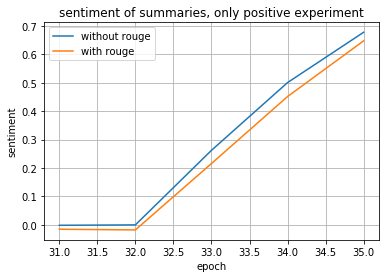

In [152]:
import matplotlib.pyplot as plt

train_metrics = [m[0] for m in metrics['control_rl_onlypos_35']['train']]
train_metrics_rouge = [m[0] for m in metrics['control_rl_onlypos_rouge_35']['train']]
x = [j for j in range(31, 31 + len(train_metrics))]
plt.plot(x, train_metrics)
plt.plot(x, train_metrics_rouge)
plt.xlabel('epoch')
plt.ylabel('sentiment')
plt.grid()
plt.legend(['without rouge', 'with rouge'])
plt.title('sentiment of summaries, only positive experiment')
plt.show()



# Experiment on only negative control codes
# Comparison: 
# RL in self-driving cars: separate model for each control

# Contribution: analysis of the problem 

# Training on all sentiments too difficult
# 1 option: train separate for each control code [answers the RQ]
# For RQ: fit sentiment into the controllable & out-of-domain features
# Or: rephrase from out-of-domain to sentiment 

# Option 1: Controllable abstractive summarization for sentiment
    # Train the model on negative/neutral sentiment
    
# Option 2: Controllable abstractive summarization using reinforcement learning
    # Train the model on control from Fan et al. 



# 2 option: pick another control feature
    

# Dense and continuous over the vocabulary space [for each word, range of values rather than set of values]
# 




# Injecting knowledge about sentiment or word length into the last layer 
# Restricting the action space 

# INPUT = EMB(WORD) + EMB(POS)
# WORD = BoW
# POS = Range


In [151]:
metrics['control_rl_onlypos_35']['train']

[[-0.0015076103162224074, 0.0, 0.0],
 [-0.0001461286365171556, 0.0, 0.0],
 [0.262281094108929, 0.0, 0.0],
 [0.5006317094192534, 0.0, 0.0],
 [0.6777344320065936, 0.0, 0.0]]

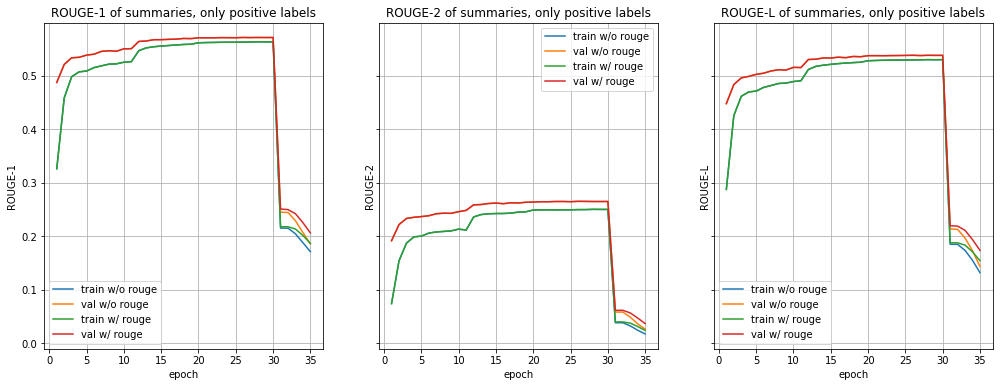

In [138]:
def visualize_rouge_performance(experiment_key, experiment_name, rouge_key=None):
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    fig.set_size_inches(17, 6)

    for i, rouge_type in enumerate(['rouge-1', 'rouge-2', 'rouge-l']):
        train_metrics = [m[rouge_type]['f'] for m in metrics[experiment_key]['train_rouge']]
        val_metrics = [m[rouge_type]['f'] for m in metrics[experiment_key]['val_rouge']]
        x = [j for j in range(1, 1 + len(train_metrics))]

        axs[i].plot(x, train_metrics)
        axs[i].plot(x, val_metrics)
        legends = ['train w/o rouge', 'val w/o rouge']

        if rouge_key is not None:            
            train_metrics_rouge = [m[rouge_type]['f'] for m in metrics[rouge_key]['train_rouge']]
            val_metrics_rouge = [m[rouge_type]['f'] for m in metrics[rouge_key]['val_rouge']]
            axs[i].plot(x, train_metrics_rouge)
            axs[i].plot(x, val_metrics_rouge)
            legends += ['train w/ rouge', 'val w/ rouge']


        axs[i].set_xlabel('epoch')
        axs[i].set_ylabel(rouge_type.upper())
        axs[i].grid()
        axs[i].legend(legends)
        axs[i].set_title(f'{rouge_type.upper()} of summaries, {experiment_name}')

    plt.show()
visualize_rouge_performance('metrics_rl_onlypos_35', 'only positive labels', 'metrics_rl_onlypos_rouge_35')

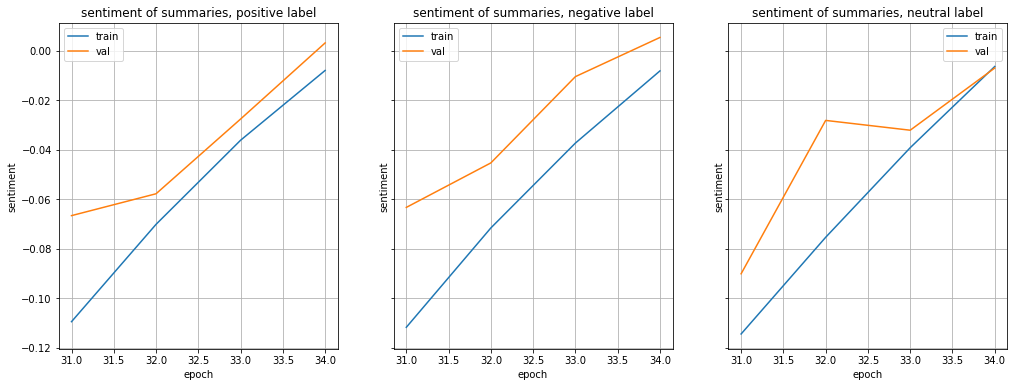

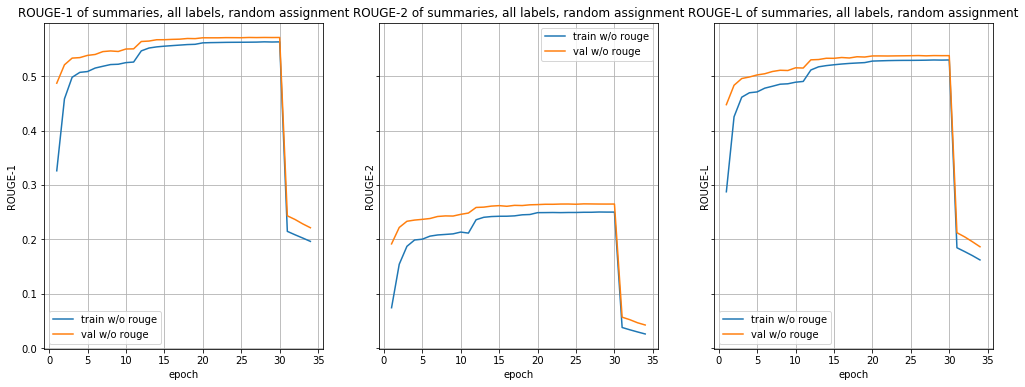

In [141]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches(17, 6)

for i, label in enumerate(['positive', 'negative', 'neutral']):
    train_metrics = [m[i] for m in metrics['control_rl_all_34']['train']]
    val_metrics = [m[i] for m in metrics['control_rl_all_34']['val']]
    x = [j for j in range(31, 31 + len(train_metrics))]

    axs[i].plot(x, train_metrics)
    axs[i].plot(x, val_metrics)
    axs[i].set_xlabel('epoch')
    axs[i].set_ylabel('sentiment')
    axs[i].grid()
    axs[i].legend(['train', 'val'])
    axs[i].set_title(f'sentiment of summaries, {label} control code')
plt.show()

visualize_rouge_performance('metrics_rl_all_34', 'all labels, random assignment')

In [143]:
metrics['control_rl_all_33']

{'train': {'performance': [[[-0.2493682823148129, 0.6131878811913948],
    [0.19305150562633605, 0.5840680343704441],
    [-0.08437543682842469, 0.6384577894319635]],
   [[-0.14541493145940615, 0.6285856324717355],
    [0.27127736679794484, 0.5666813097617556],
    [0.007476044984903277, 0.6386684345741357]],
   [[-0.044571396701370704, 0.6426927339735624],
    [0.34947833162838343, 0.5532230104865732],
    [0.10281707001765092, 0.6406317260332509]]],
  'count': [[90098, 53765, 143878],
   [89509, 53828, 144404],
   [90098, 53765, 143878]]},
 'val': {'performance': [[[-0.21514367881548965, 0.6151351795266897],
    [0.27014458250496987, 0.5578083143160507],
    [-0.03794255279733256, 0.6347941065808591]],
   [[-0.12053323806802008, 0.6220674746200018],
    [0.3105528811830697, 0.5513208627720013],
    [0.0525103625045771, 0.6366806764922426]],
   [[-0.0310806093394077, 0.6448253494408719],
    [0.3892777335984093, 0.5423721675166423],
    [0.12466076324564654, 0.6400616417486924]]],
  '

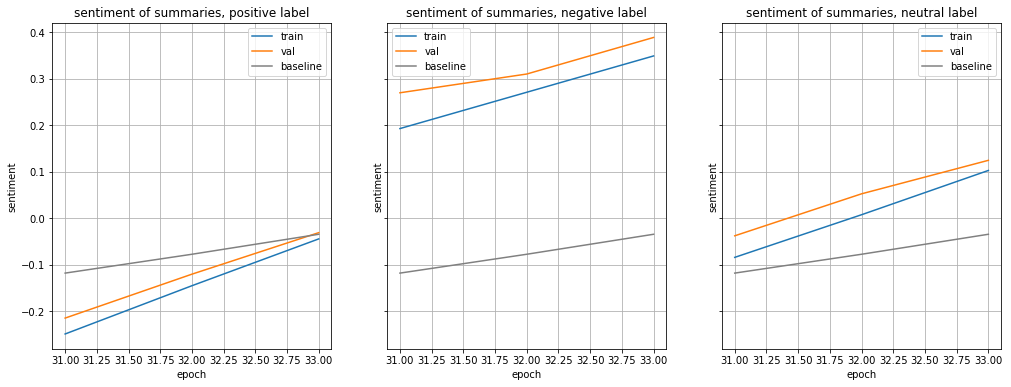

In [148]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches(17, 6)

for i, label in enumerate(['positive', 'negative', 'neutral']):
    train_metrics = [m[i][0] for m in metrics['control_rl_all_33']['train']['performance']]
    val_metrics = [m[i][0] for m in metrics['control_rl_all_33']['val']['performance']]
    baseline = [m[0] for m in metrics['control_rl_all_33']['baseline']]
    x = [j for j in range(31, 31 + len(train_metrics))]

    axs[i].plot(x, train_metrics)
    axs[i].plot(x, val_metrics)
    axs[i].plot(x, baseline, c='grey')
    axs[i].set_xlabel('epoch')
    axs[i].set_ylabel('sentiment')
    axs[i].grid()
    axs[i].legend(['train', 'val', 'baseline'])
    axs[i].set_title(f'sentiment of summaries, {label} control code')
plt.show()

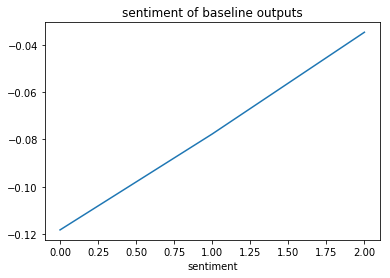

In [146]:
b = [m[0] for m in metrics['control_rl_all_33']['baseline']]
plt.plot(b)
plt.xlabel('epoch')
plt.xlabel('sentiment')
plt.title('sentiment of baseline outputs')
plt.show()

In [150]:
metrics['control_rl_all_33']['train']['performance']

# Confidence interval # Variance


[[[-0.2493682823148129, 0.6131878811913948],
  [0.19305150562633605, 0.5840680343704441],
  [-0.08437543682842469, 0.6384577894319635]],
 [[-0.14541493145940615, 0.6285856324717355],
  [0.27127736679794484, 0.5666813097617556],
  [0.007476044984903277, 0.6386684345741357]],
 [[-0.044571396701370704, 0.6426927339735624],
  [0.34947833162838343, 0.5532230104865732],
  [0.10281707001765092, 0.6406317260332509]]]